## Observations and Insights

## Dependencies and starter code

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# Merge our two data frames together
combined_studies_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_studies_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
mice_data_df = combined_studies_data[["Drug Regimen", "Tumor Volume (mm3)", "Sex"]]

In [46]:
mice_data_group = mice_data_df.groupby(["Drug Regimen"])
mice_data_group

## Summary statistics

In [47]:
# Generate a summary statistics table of mean, median, variance,
#standard deviation, and SEM of the tumor volume for each regimen
combined_dr = mice_data_group.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
combined_dr

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

In [105]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_regimen_data = mice_data_group["Tumor Volume (mm3)"].count()
drug_regimen_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

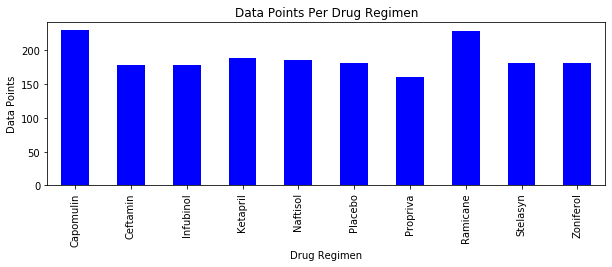

In [106]:
#Generate bar plot using pandas
drug_regimen_data.plot(kind="bar", color="b", figsize=(10,3))

#bar plot details
plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

Text(0, 0.5, 'Data Points')

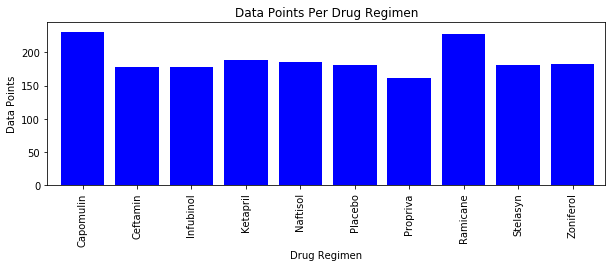

In [107]:
#Generate bar plot using pyplot 
drug_regimen_data = drug_regimen_data.reset_index()

#x_axis is all the drug regimens
x_axis = np.arange(len(mice_data_group))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,3))

#bar plot details
plt.bar(x_axis, drug_regimen_data["Tumor Volume (mm3)"], color='b', align="edge")
plt.xticks(tick_locations, drug_regimen_data["Drug Regimen"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(drug_regimen_data["Tumor Volume (mm3)"])+15)
plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie plots

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = combined_studies_data[["Mouse ID", "Sex"]]
mice_gendermod_df = mice_gender_df.drop_duplicates()
mice_gender_group = mice_gendermod_df.groupby(["Sex"])
mice_gender_data = pd.DataFrame(mice_gender_group["Sex"].count())
remice_gender_data = mice_gender_data.rename(columns={"Sex": "Number of Mice"})

remice_gender_data

,Number of Mice
Sex,
Female,124
Male,125


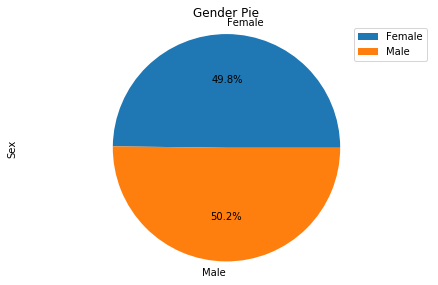

In [118]:
# Create a pie chart based upon the trip duration of that single bike
gender_pie = remice_gender_data.plot(kind='pie', y="Number of Mice", title=("Gender Pie"), autopct="%1.1f%%")
plt.tight_layout()
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
regender_pie = remice_gender_data.reset_index()
regender_pie

,Sex,Number of Mice
0,Female,124
1,Male,125


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


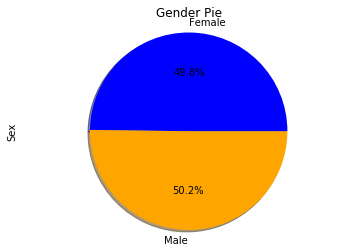

In [120]:
x_axis = remice_gender_data["Number of Mice"]
labels = regender_pie["Sex"]
colors = ["blue", "orange"]
plt.title("Gender Pie")
plt.pie(remice_gender_data, labels=labels, colors=colors, shadow=True, startangle=360, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [143]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
iqr_data = combined_studies_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint"]]
iqr_data


,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,k403,Ramicane,45.000000,0
1,k403,Ramicane,38.825898,5
2,k403,Ramicane,35.014271,10
3,k403,Ramicane,34.223992,15
4,k403,Ramicane,32.997729,20
...,...,...,...,...
1888,z969,Naftisol,63.145652,25
1889,z969,Naftisol,65.841013,30
1890,z969,Naftisol,69.176246,35
1891,z969,Naftisol,70.314904,40


In [144]:
#find the last timepoint which is the last datapoint in the drug treatment
df_filtered = iqr_data.loc[lambda x: x['Timepoint'] == 45]
df_filtered

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
9,k403,Ramicane,22.050126,45
19,s185,Capomulin,23.343598,45
29,x401,Capomulin,28.484033,45
39,m601,Capomulin,28.430964,45
49,g791,Ramicane,29.128472,45
...,...,...,...,...
1845,y769,Ceftamin,68.594745,45
1855,y865,Ceftamin,64.729837,45
1872,z581,Infubinol,62.754451,45
1882,z795,Naftisol,65.741070,45


In [228]:
iqr_group = df_filtered.groupby(["Mouse ID", "Drug Regimen"])
iqr_group

In [262]:
min_tumor_mouse = pd.DataFrame(iqr_group["Tumor Volume (mm3)"].min())
min_tumor_mouse


,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a262,Placebo,70.717621
a275,Ceftamin,62.999356
a401,Zoniferol,66.794156
...,...,...
y865,Ceftamin,64.729837
z578,Ramicane,30.638696
z581,Infubinol,62.754451


In [263]:
#reset index to algin them
min_tumor_df = min_tumor_mouse.reset_index(["Drug Regimen"])
min_tumor_df


,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a262,Placebo,70.717621
a275,Ceftamin,62.999356
a401,Zoniferol,66.794156
...,...,...
y865,Ceftamin,64.729837
z578,Ramicane,30.638696
z581,Infubinol,62.754451


In [257]:
#list tumor volumes for each drug
drug_tumors_group = min_tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
drug_tumors_df = pd.DataFrame(drug_tumors_group)
drug_tumors_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[38.98287774, 38.93963263, 37.07402422, 40.159..."
Ceftamin,"[62.99935619, 61.84902336, 68.92318457, 67.748..."
Infubinol,"[67.97341878, 65.52574285, 66.08306589, 72.226..."
Ketapril,"[65.41595451, 69.87225079, 74.10408567, 73.715..."
Naftisol,"[74.99776443, 73.05136339, 63.1056963, 68.3597..."
Placebo,"[70.71762058, 72.25596306, 65.81516535, 69.042..."
Propriva,"[62.19141437, 70.49278763, 58.63340414, 72.455..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."
Stelasyn,"[60.12201052, 62.76509317, 72.55523894, 74.040..."


In [258]:
#list most promising regmiens
best_drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
best_drugs_df = drug_tumors_df.reindex(best_drugs)
best_drugs_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[38.98287774, 38.93963263, 37.07402422, 40.159..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."
Infubinol,"[67.97341878, 65.52574285, 66.08306589, 72.226..."
Ceftamin,"[62.99935619, 61.84902336, 68.92318457, 67.748..."


In [248]:
best_drugs_df = best_drugs_df[best_drugs_df["Drug Regimen"]=="Capomulin"]
best_drugs_df

KeyError: 'Drug Regimen'

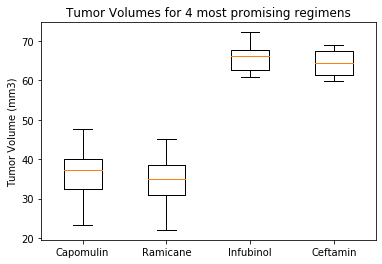

In [217]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol_df = best_drugs_df['Tumor Volume (mm3)']
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes for 4 most promising regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_df, labels=best_drugs, showfliers=True, flierprops=green_diamond)
plt.show()

In [218]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = tumor_vol_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

TypeError: can't multiply sequence by non-int of type 'float'

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse
#weight and average tumor volume for the Capomulin regimen